In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
print(X.shape,y.shape)

(3750, 1) (3750,)


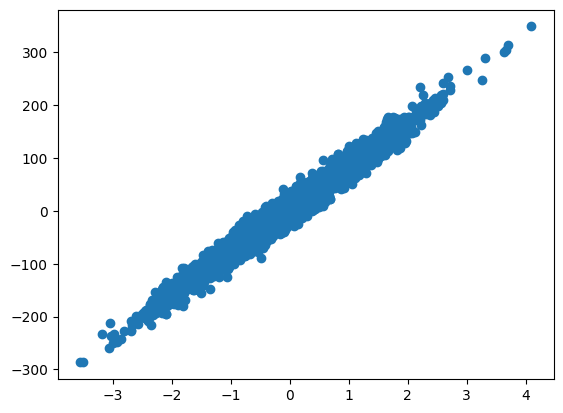

In [6]:
plt.scatter(X,y)
plt.show()

In [21]:
def hypothesis(X,w,w0):
    # ypred = []
    # for i in range(X.shape[0]):
    #     p = X[i].dot(w) + w0
    #     ypred.append(p)
    # return np.array(ypred)
    return w@X.T + w0

In [22]:
w = [1,2]
w0 = 1
ypred = hypothesis(np.array([[1,2],[3,4],[5,6]]),w,w0)

In [23]:
ypred

array([ 6, 12, 18])

In [24]:
def loss(X,w,w0,y):
    ypred = hypothesis(X,w,w0)
    return np.mean((ypred-y)**2)

In [25]:
w = [1]
w0 = 1
loss(X,w,w0,y)

6418.398281673329

In [61]:
def gradientDescent(X,y,lr=0.01,epochs = 100):
    w0 = 1
    w = np.ones(shape=(X.shape[1],))

    for e in range(epochs):
        ypred = hypothesis(X,w,w0)
        grad = np.mean((ypred-y)*X.T,axis = 1)
        # grad = np.zeros(shape=(X.shape[1],))
        # for j in range(X.shape[1]):
        #     # for i in range(X.shape[0]):
        #     #     grad[j] += (ypred[i] - y[i])*X[i,j]
        #     # grad[j] /= X.shape[0]
        #     grad[j] = np.mean((ypred-y)*X[:,j])

        w = w-lr*grad
        w0 = w0-lr*np.mean(ypred-y)
    return w,w0

In [62]:
w,w0 = gradientDescent(X,y,lr = 0.01,epochs=10000)

In [63]:
w,w0

(array([80.54363185]), 3.7279882844526835)

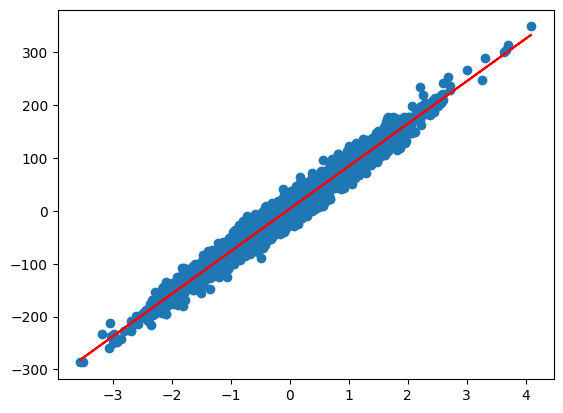

In [64]:
plt.scatter(X,y)
plt.plot(X,hypothesis(X,w,w0),c = 'r')
plt.show()

In [95]:
class LinearReg:
    def __init__(self,lr = 0.01,epochs = 100):
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.w,self.w0 = self.gradientDescent(X,y,self.lr,self.epochs)

    def hypothesis(self,X,w,w0):
        return w@X.T + w0

    def loss(self,X,w,w0,y):
        ypred = hypothesis(X,w,w0)
        return np.mean((ypred-y)**2)

    def gradientDescent(self,X,y,lr=0.01,epochs = 100):
        w0 = 1
        w = np.ones(shape=(X.shape[1],))
        self.loss_e = []
    
        for e in range(epochs):
            ypred = hypothesis(X,w,w0)
            self.loss_e.append(self.loss(X,w,w0,y))
            grad = np.mean((ypred-y)*X.T,axis = 1)
            w = w-lr*grad
            w0 = w0-lr*np.mean(ypred-y)
        return w,w0

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    

In [96]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [97]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
clf = LinearReg(epochs=400)
clf.fit(x_train,y_train)

In [119]:
# clf.predict(x_test)

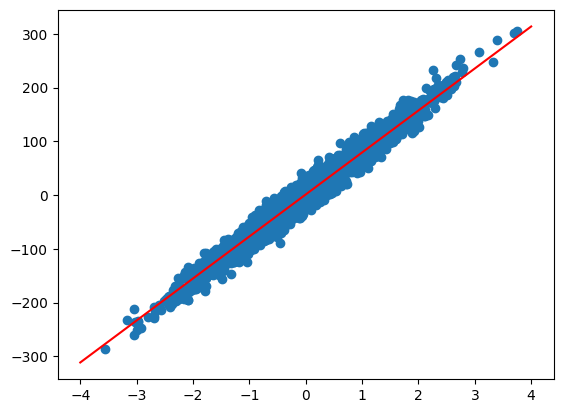

In [120]:
xt = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(x_train,y_train)
# plt.scatter(x_test,y_test)
plt.plot(xt,clf.predict(xt),c='r')
plt.show()

In [121]:
r2_score(y_test,clf.predict(x_test))

0.9713632121930161

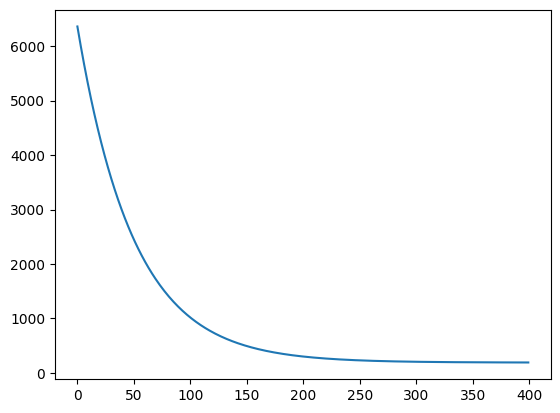

In [122]:
plt.plot(clf.loss_e)
plt.show()